# Mall Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [5]:
df=df.drop('CustomerID',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


<Axes: >

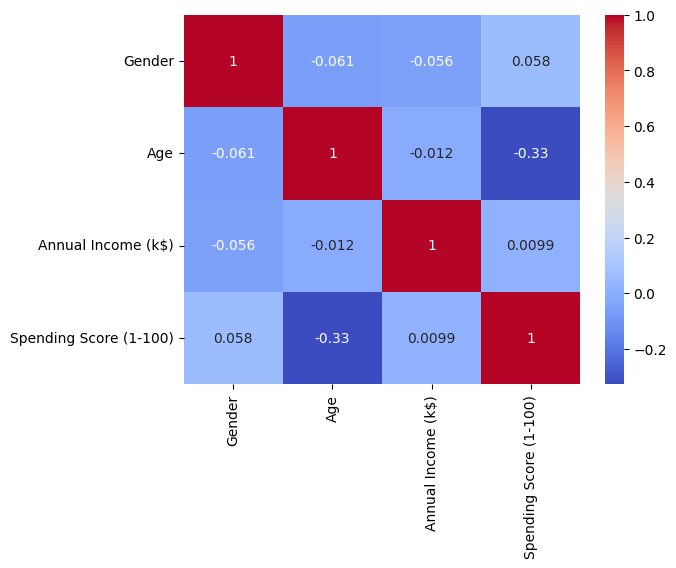

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

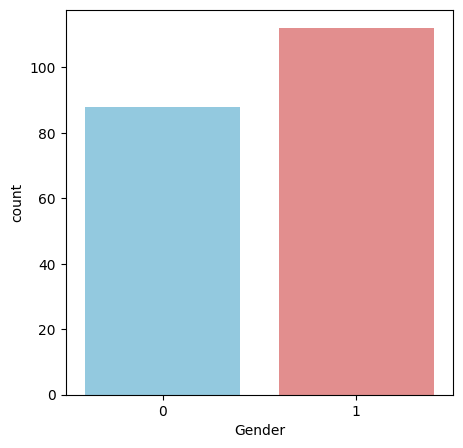

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", data=df, palette=['skyblue', 'lightcoral'])
plt.show()

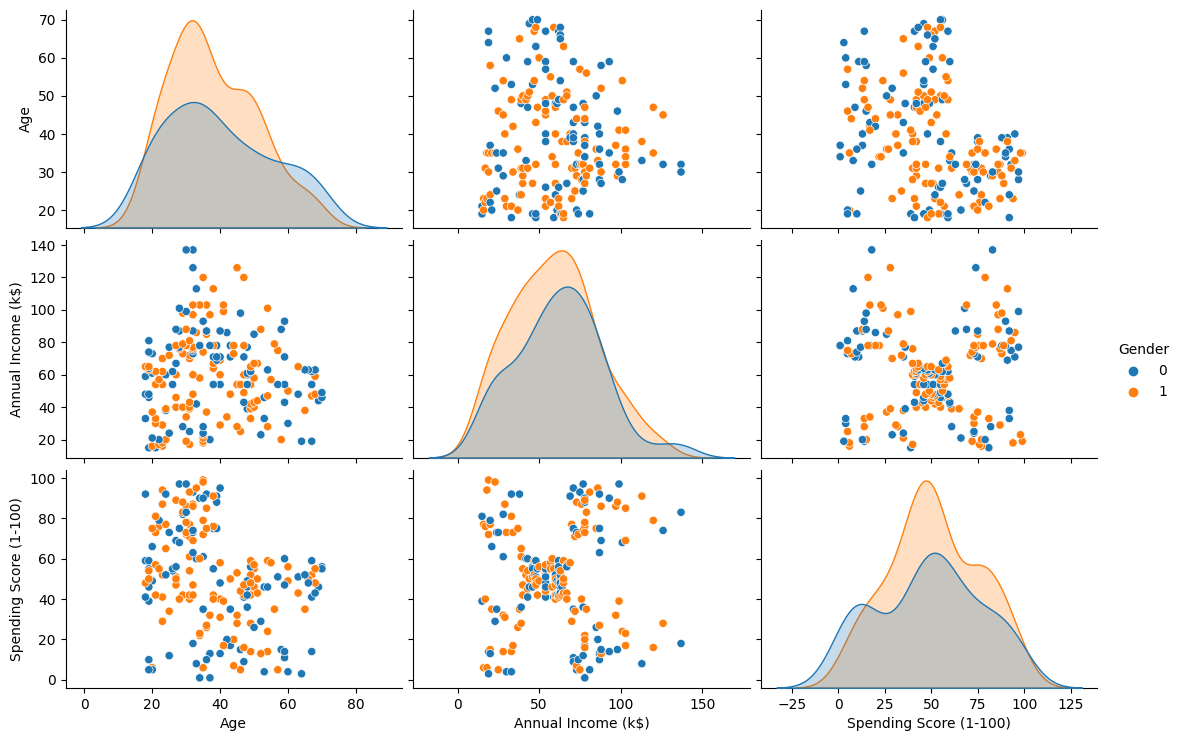

In [10]:
sns.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

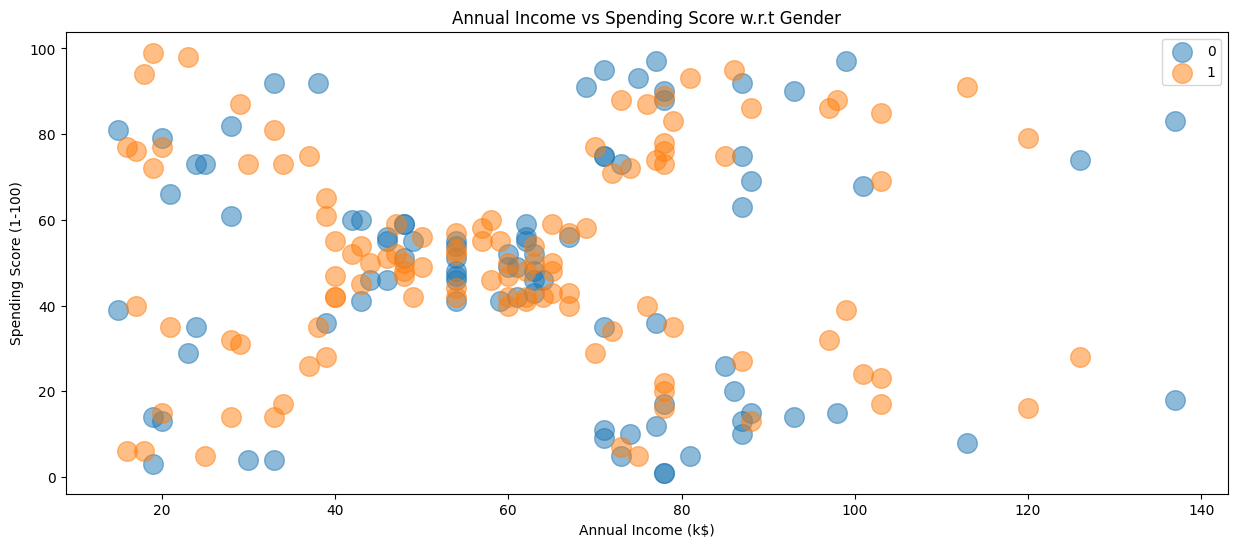

In [11]:
plt.figure(figsize = (15 , 6))
for gender in [0,1]:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# Clustering using K- means

Segmentation using Annual Income and Spending Score

In [12]:
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

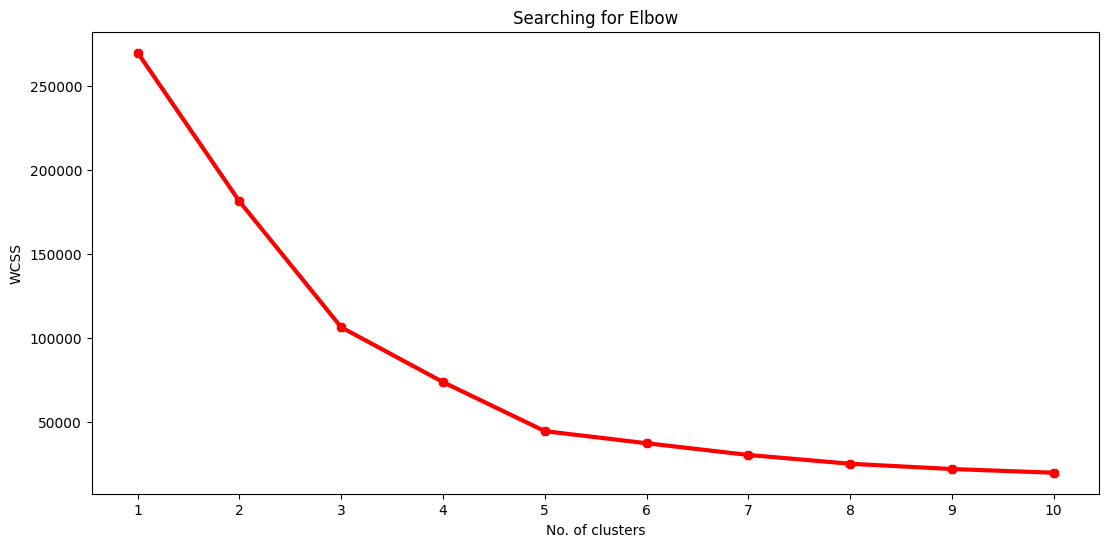

In [13]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [14]:
km = KMeans(n_clusters=5)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

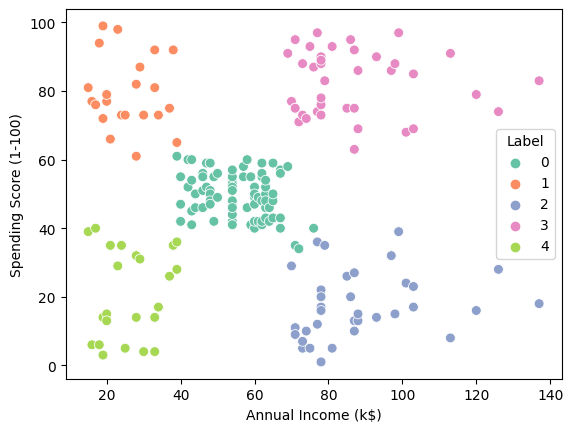

In [15]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X1, hue='Label', s=50, palette='Set2')

Segmentation using Age and Spending Score

In [16]:
X2 = df[['Age' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

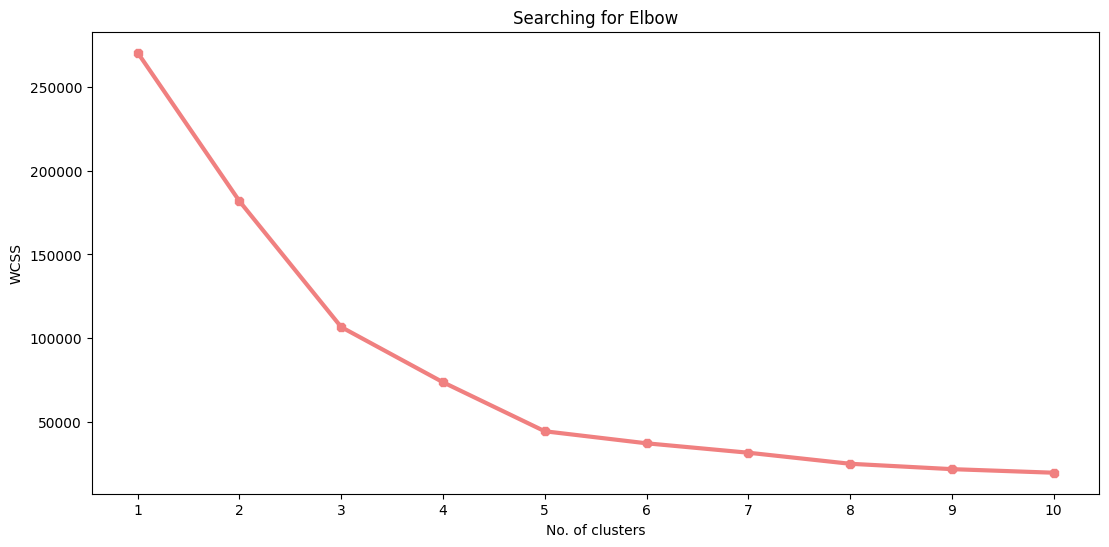

In [17]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='lightcoral', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [18]:
km = KMeans(n_clusters=4)
km.fit(X2)
y = km.predict(X2)
X2['Label'] = y
X2.head()

,Age,Spending Score (1-100),Label
0,19,39,1
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,1


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

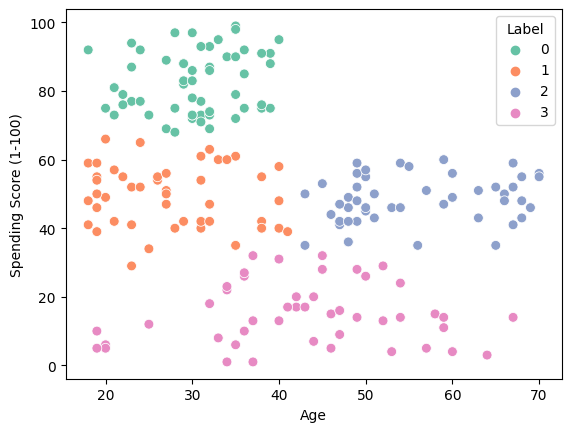

In [19]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X2, hue='Label', s=50, palette='Set2')


Segmentation using Age , Annual Income and Spending Score

In [20]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

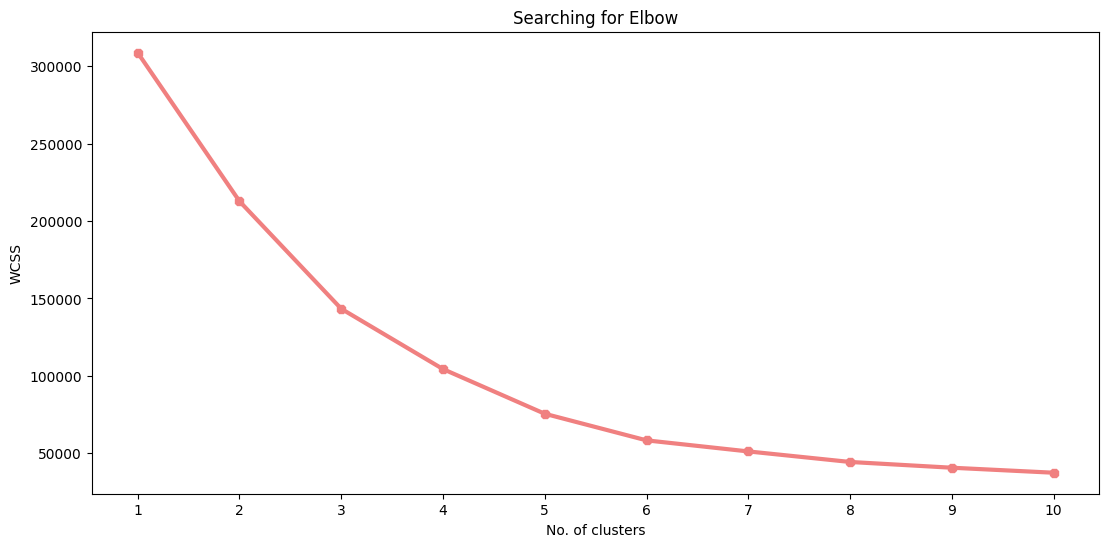

In [21]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='lightcoral', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [22]:
km = KMeans(n_clusters=4)
km.fit(X3)
y = km.predict(X3)
X3['Label'] = y
X3.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,3
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,1


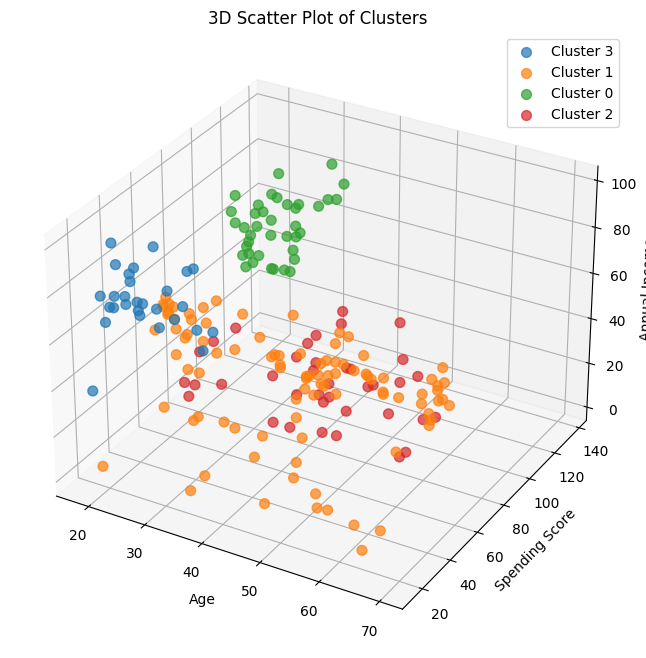

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X3['Label'].unique():
    cluster_data = X3[X3['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],  
        cluster_data.iloc[:, 1], 
        cluster_data.iloc[:, 2],  
        label=f'Cluster {label}',
        s=50, alpha=0.7
    )
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()


# Agglomerative Hierarchical Clustering

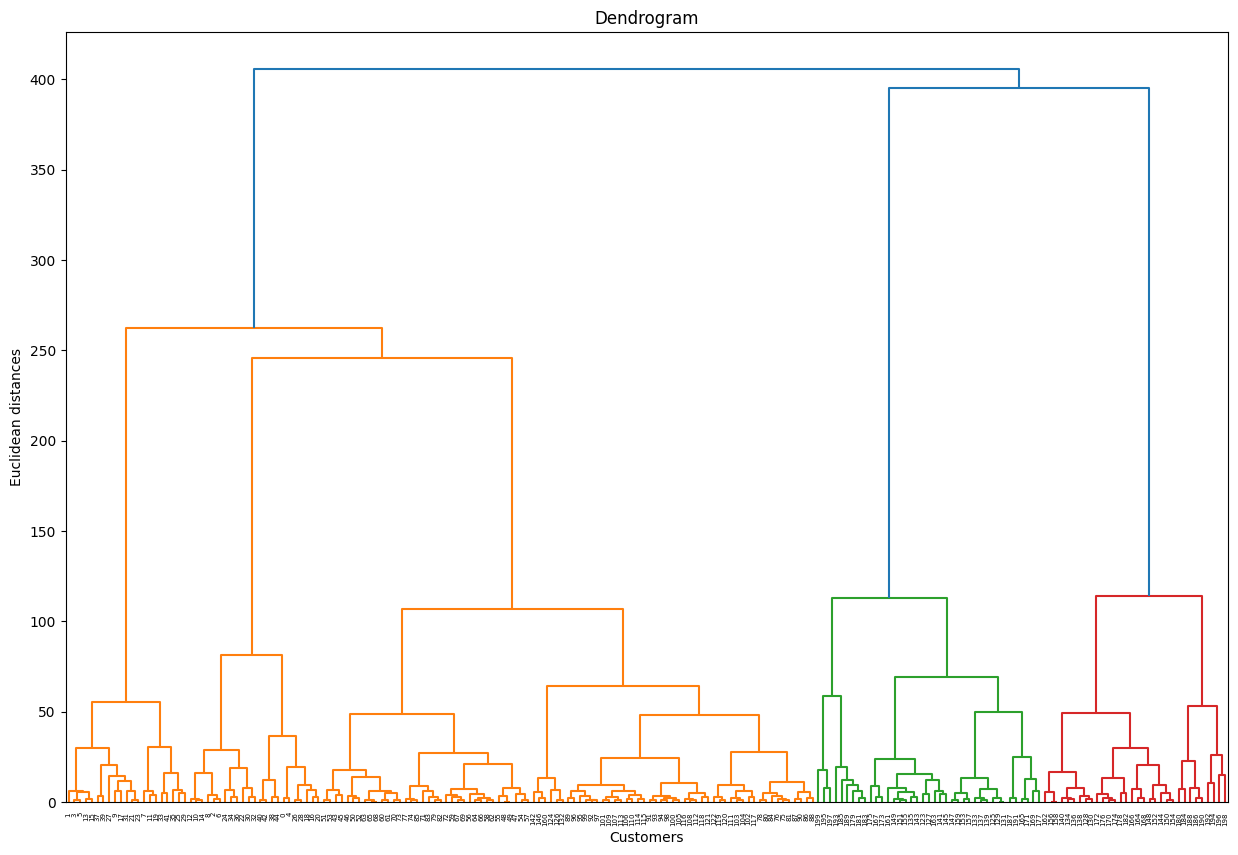

In [24]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

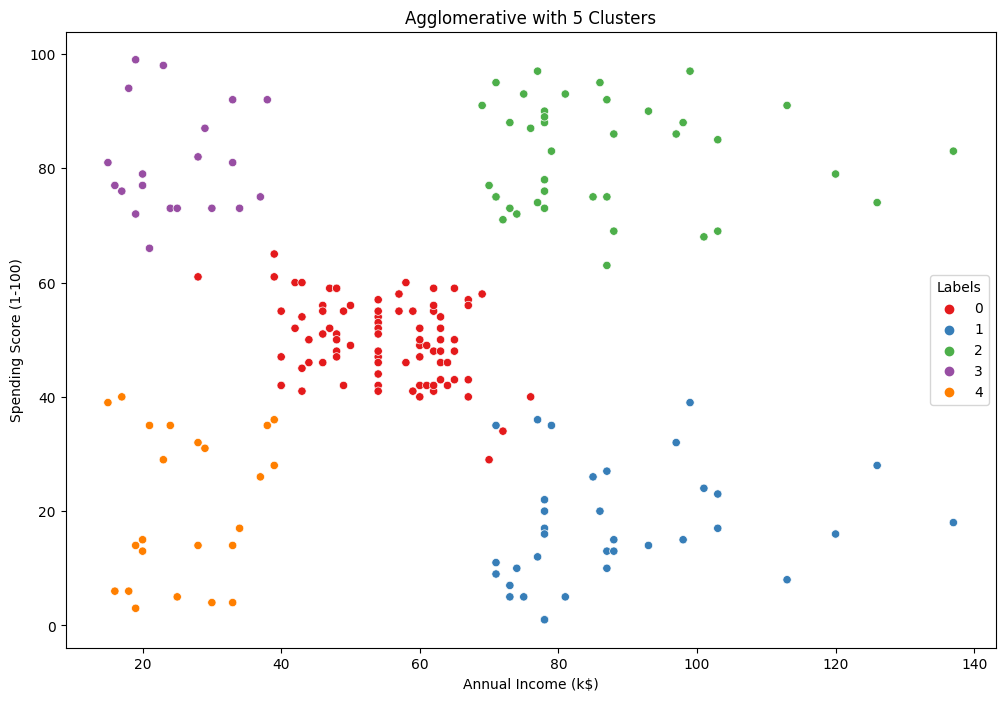

In [25]:
agglom = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
y = agglom.fit_predict(df)
df['Labels'] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', 
                data=df, palette='Set1')
plt.title('Agglomerative with 5 Clusters')
plt.show()

# DBSCAN

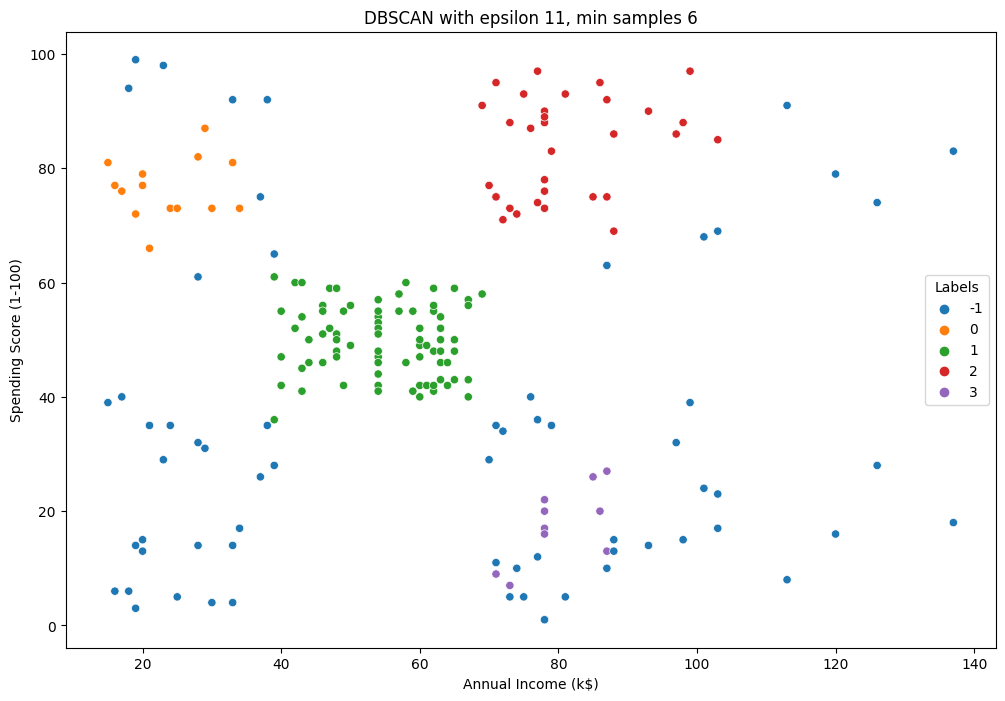

In [26]:
db = DBSCAN(eps=11, min_samples=6)
y = db.fit_predict(df)
df['Labels'] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Labels', 
    data=df, 
    palette=sns.color_palette('tab10', len(np.unique(y)))
)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()